In [11]:
import os
root_proj = '/Users/luo/OneDrive/GitHub/Glacier-in-RGI1305'
os.chdir(root_proj)


In [38]:
import numpy as np
import h5py
import xdem
import matplotlib.pyplot as plt
from utils.geotif_io import readTiff, writeTiff
from utils.imgShow import imgShow
from utils.crop_to_extent import crop_to_extent
from utils.raster_vec import vec2mask
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader


In [40]:
path_tandem = 'data/dem-data/tandem-x/TDM1_DEM__30_N36E078_V01_C/DEM/TDM1_DEM__30_N36E078_DEM.tif'   # slave dem
path_wat = 'data/water_jrc/water_jrc_36_78.tif'


In [35]:
### Read one-year/full-region glas14/icesat data
with h5py.File('data/icesat/glah14-readout/tile-36-78/GLAH14_2009_subs.H5','r') as f_glas14:
    lat_glas14 = f_glas14['h_lat'][:]
    lon_glas14 = f_glas14['h_lon'][:]
    h_glas14 = f_glas14['h_cor'][:]
    t_glas14 = f_glas14['t_dyr'][:]
    print(f_glas14.keys())



<KeysViewHDF5 ['h_cor', 'h_lat', 'h_lon', 'h_orbit', 'h_track', 't_dyr']>


Text(0.5, 1.0, 'wat')

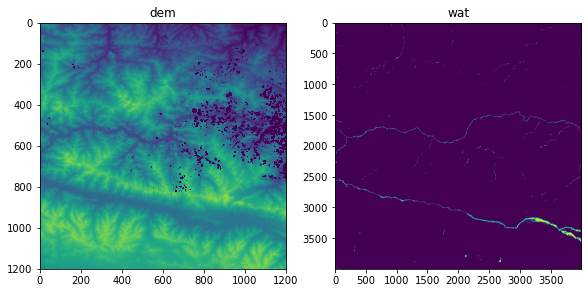

In [32]:
dem_img, dem_info = readTiff(path_tandem)    #  dem
wat_img, wat_info = readTiff(path_wat)    #  dem

plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.imshow(dem_img, vmin=2000, vmax=7000); plt.title('dem')
plt.subplot(1,3,2); plt.imshow(wat_img); plt.title('wat')


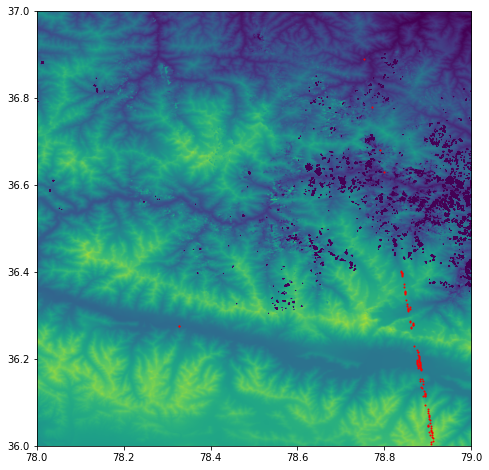

In [58]:
fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator(central_longitude=88.5))
# plt.subplot(1,1,1);

plt.imshow(dem_img, vmin=2000, vmax=7000, extent=dem_info['geoextent']);
plt.scatter(x=lon_glas14, y=lat_glas14, c='red', s=1, zorder=0)



0.5397260273972603